<a href="https://colab.research.google.com/github/HinaNitano/EU_M_Math/blob/main/Chap09_Ex_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [11]:
import requests, zipfile
import io

url = 'https://archive.ics.uci.edu/static/public/53/iris.zip'

res = requests.get(url).content

z = zipfile.ZipFile(io.BytesIO(res))
z.extractall()

In [12]:
ls

bank-additional.zip  bank.zip  bezdekIris.data  Index  iris.data  iris.names  sample_data/


In [17]:
import requests, zipfile
import io

url = 'https://archive.ics.uci.edu/static/public/53/iris.zip'

res = requests.get(url).content

z = zipfile.ZipFile(io.BytesIO(res))
z.extractall()

Iris = pd.read_csv('bezdekIris.data', header=None) # The dataset does not have a header row
Iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] # Name the columns

# Separate features and target variable
X = Iris.drop('species', axis=1)
y = Iris['species']

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 標準化
sc = StandardScaler()
X_std = sc.fit_transform(X) # Scale only the features

# 主成分分析
pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

print('X_pca shape:{}'.format(X_pca.shape))
print('Explained variance ratio:{}'.format(pca.explained_variance_ratio_))

X_pca shape:(150, 2)
Explained variance ratio:[0.73  0.229]


In [20]:
X_pca = pd.DataFrame(X_pca, columns=['pc1', 'pc2'])

X_pca = pd.concat([X_pca, pd.DataFrame(y, columns=['target'])], axis=1)

pca1 = X_pca[X_pca['target']==0]
pca2 = X_pca[X_pca['target']==1]

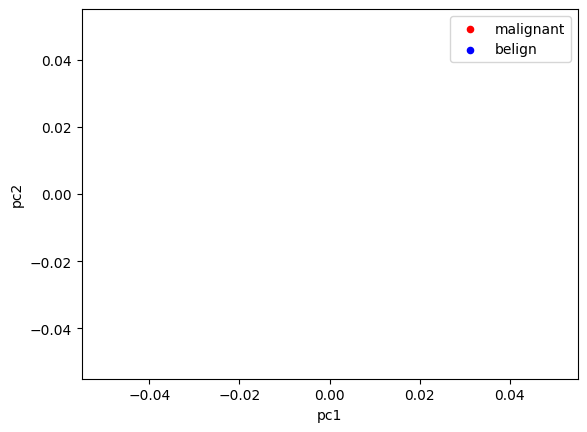

In [21]:
ax = pca1.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');

pca2.plot.scatter(x='pc1', y='pc2', color='blue', label='belign', ax=ax);